# Environmetal sound classification


<a href="https://colab.research.google.com/github/GianmarcoLattaruolo/Vision_Project/blob/main/Vision_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory analysis




Run this cell again if you modify some scripts.

In [1]:
import sys  
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import librosa
from scipy.io import wavfile
import seaborn as sb
sb.set(style="white", palette="muted")
import pandas as pd
import IPython.display
import random
from scipy import signal


#libraries
main_dir = os.getcwd()
module_path = main_dir
if module_path not in sys.path:
    print('Adding the folder for the modules')
    sys.path.append(module_path)

import importlib
imported_module = importlib.import_module("Preprocessing.data_loader")
importlib.reload(imported_module)
imported_module = importlib.import_module("Preprocessing.exploration_plots")
importlib.reload(imported_module)
imported_module = importlib.import_module("Preprocessing.clip_utils")
importlib.reload(imported_module)
from Preprocessing.data_loader import download_dataset,load_metadata
from Preprocessing.exploration_plots import one_random_audio, power_spectrum_plot, plot_clip_overview

Run this cell once to download the dataset.


In [2]:
in_colab = 'google.colab' in sys.modules
if in_colab:
    print('Downloading the ESC-50 dataset')
    download_dataset('ESC-50')

## Base Exploration of the dataset

In this cell we can listen to one random audio in our dataset (different every time we run the cell). 
Moreover we visualize a portion of the audio.


The sample rate is44100
The data shape is (220500,)
Audio category: rain


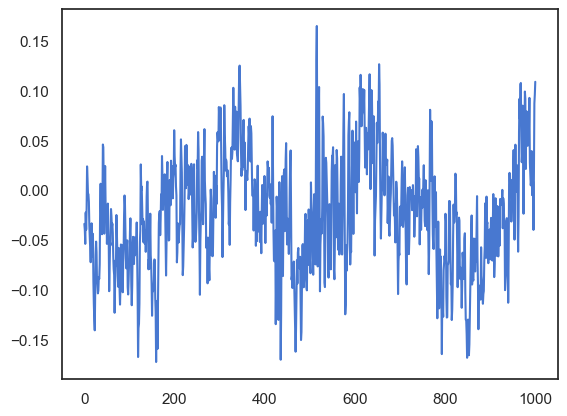

In [3]:
audio, samplerate = one_random_audio(main_dir)

Text(0.5, 1.0, 'Spectrogram: Input ((220500,), 1102, 441) > Output (552, 332)')

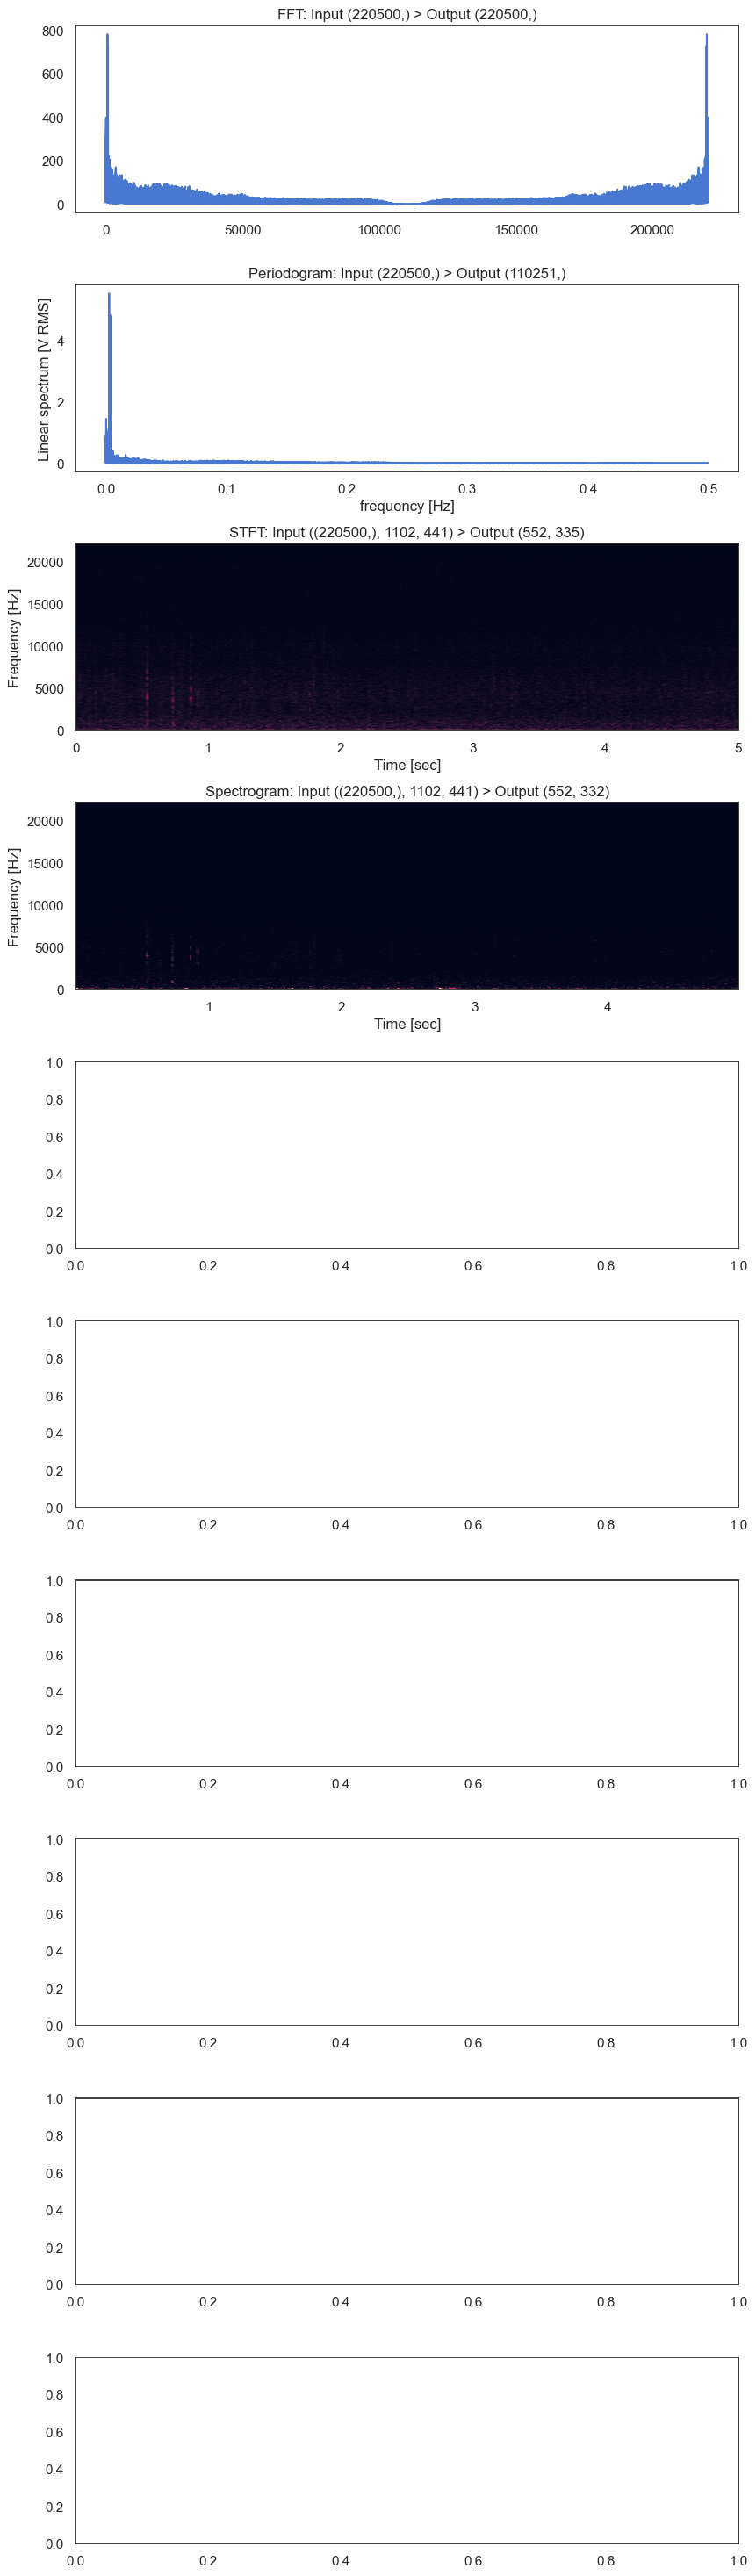

In [5]:
#type of spectrum, transformation windows ecc:
from scipy.fft import fft,ifft,fftfreq, fftshift
from scipy.signal import stft,spectrogram,periodogram

sample_rate = 44100
segment=25
overlapping=10 #in milliseconds

nperseg = round(sample_rate * segment / 1000)  # Calculate the number of samples per segment
noverlap = round(sample_rate * overlapping / 1000)

plt.subplots(10, 1, figsize=(9, 30))
plt.tight_layout(pad=3)
#plt.title(f': Input {.shape} > Output {.shape}')
# SCIPY

y_hat = fft(audio)
plt.subplot(10,1,1)
plt.plot(np.abs(y_hat))
plt.title(f'FFT: Input {audio.shape} > Output {y_hat.shape}')

f, y_norm = periodogram(audio)
plt.subplot(10,1,2)
plt.plot(f , y_norm)
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.title(f'Periodogram: Input {audio.shape} > Output {y_norm.shape}')

f, t, stft_y = stft(audio,fs = samplerate, nperseg=nperseg, noverlap=noverlap)
plt.subplot(10,1,3)
plt.pcolormesh(t, f, np.abs(stft_y),shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title(f'STFT: Input {audio.shape, nperseg, noverlap} > Output {stft_y.shape}')

f,t , spec_y = spectrogram(audio, fs = samplerate, nperseg=nperseg, noverlap=noverlap)
plt.subplot(10,1,4)
plt.pcolormesh(t, f, spec_y)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title(f'Spectrogram: Input {audio.shape, nperseg, noverlap} > Output {spec_y.shape}')

#LIBROSA



Let's see a periodogram (power spectrum) for our clip.

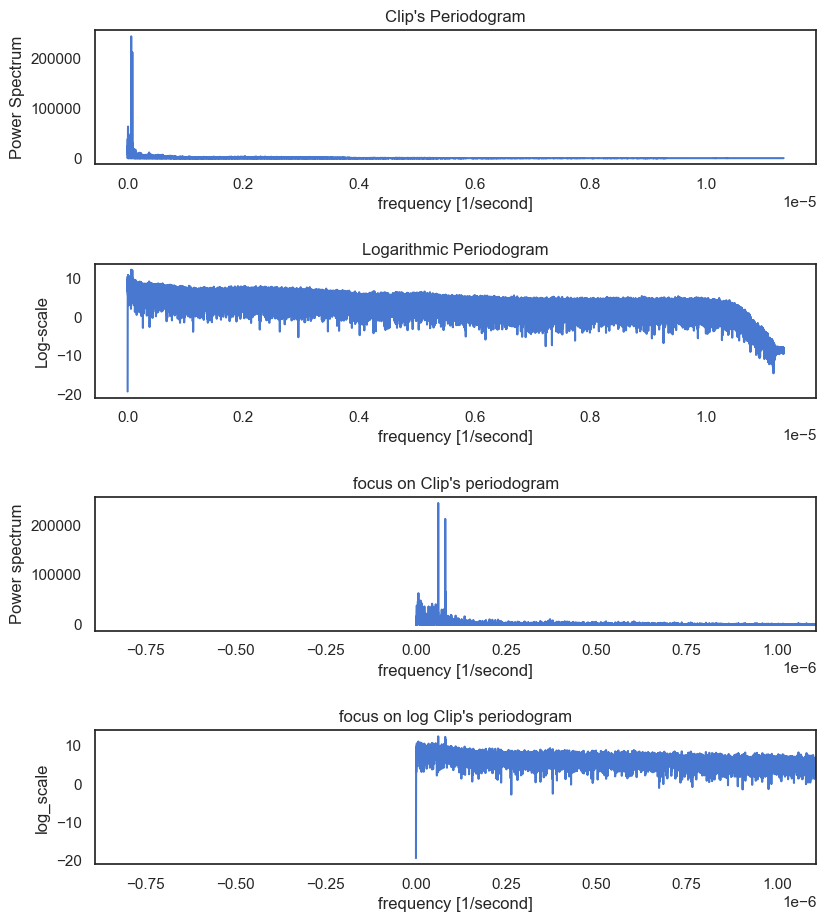

In [6]:
power_spectrum_plot(audio, samplerate)

We can say that, as we expected, this type of analysis on the entire audio clip is meaningless. We'll need to fragment the audio clips.
But first let's produce some summary statistics about our dataset.

In [8]:
df_ESC10, df_ESC50 , df_ESC_US = load_metadata(main_dir, ESC_US = True)
# default values are:
# heads = True, statistics = False, audio_listen = False, ESC50=True, ESC10=True, ESC_US=False

,filename,fold,target,category,esc10,src_file,take,full_path
0,1-100032-A-0.wav,1,0,dog,True,100032,A,/Users/leonardo/Desktop/HDA/Human_Data_Analyti...
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A,/Users/leonardo/Desktop/HDA/Human_Data_Analyti...
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A,/Users/leonardo/Desktop/HDA/Human_Data_Analyti...
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B,/Users/leonardo/Desktop/HDA/Human_Data_Analyti...
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A,/Users/leonardo/Desktop/HDA/Human_Data_Analyti...


Classes in the full dataset  are perfectly balanced
 Counter({'dog': 40, 'chirping_birds': 40, 'vacuum_cleaner': 40, 'thunderstorm': 40, 'door_wood_knock': 40, 'can_opening': 40, 'crow': 40, 'clapping': 40, 'fireworks': 40, 'chainsaw': 40, 'airplane': 40, 'mouse_click': 40, 'pouring_water': 40, 'train': 40, 'sheep': 40, 'water_drops': 40, 'church_bells': 40, 'clock_alarm': 40, 'keyboard_typing': 40, 'wind': 40, 'footsteps': 40, 'frog': 40, 'cow': 40, 'brushing_teeth': 40, 'car_horn': 40, 'crackling_fire': 40, 'helicopter': 40, 'drinking_sipping': 40, 'rain': 40, 'insects': 40, 'laughing': 40, 'hen': 40, 'engine': 40, 'breathing': 40, 'crying_baby': 40, 'hand_saw': 40, 'coughing': 40, 'glass_breaking': 40, 'snoring': 40, 'toilet_flush': 40, 'pig': 40, 'washing_machine': 40, 'clock_tick': 40, 'sneezing': 40, 'rooster': 40, 'sea_waves': 40, 'siren': 40, 'cat': 40, 'door_wood_creaks': 40, 'crickets': 40})


,filename,fold,target,category,src_file,take,full_path
0,1-100032-A-0.wav,1,0,dog,100032,A,/Users/leonardo/Desktop/HDA/Human_Data_Analyti...
14,1-110389-A-0.wav,1,0,dog,110389,A,/Users/leonardo/Desktop/HDA/Human_Data_Analyti...
24,1-116765-A-41.wav,1,41,chainsaw,116765,A,/Users/leonardo/Desktop/HDA/Human_Data_Analyti...
54,1-17150-A-12.wav,1,12,crackling_fire,17150,A,/Users/leonardo/Desktop/HDA/Human_Data_Analyti...
55,1-172649-A-40.wav,1,40,helicopter,172649,A,/Users/leonardo/Desktop/HDA/Human_Data_Analyti...


Classes in ESC10 
 ['dog', 'crying_baby', 'sea_waves', 'helicopter', 'rain', 'crackling_fire', 'chainsaw', 'rooster', 'sneezing', 'clock_tick']
Loading the 1/2 folder of unlabeled data 
Loading the 2/2 folder of unlabeled data 
We have 20000 unlabeled audios.


,filename,full_path
0,016514-31948-40-45.ogg,/Users/leonardo/Desktop/HDA/Human_Data_Analyti...
1,019507-35054-0-5.ogg,/Users/leonardo/Desktop/HDA/Human_Data_Analyti...
2,016972-32311-300-305.ogg,/Users/leonardo/Desktop/HDA/Human_Data_Analyti...
3,016774-32197-50-55.ogg,/Users/leonardo/Desktop/HDA/Human_Data_Analyti...
4,014522-29650-260-265.ogg,/Users/leonardo/Desktop/HDA/Human_Data_Analyti...


## Spectrogram Analysis

Now we dig in the analysis exploiting the natural structure of sound in nature. 
In particular we'll need the [Short-Time Fourier Transform](https://en.wikipedia.org/wiki/Short-time_Fourier_transform).

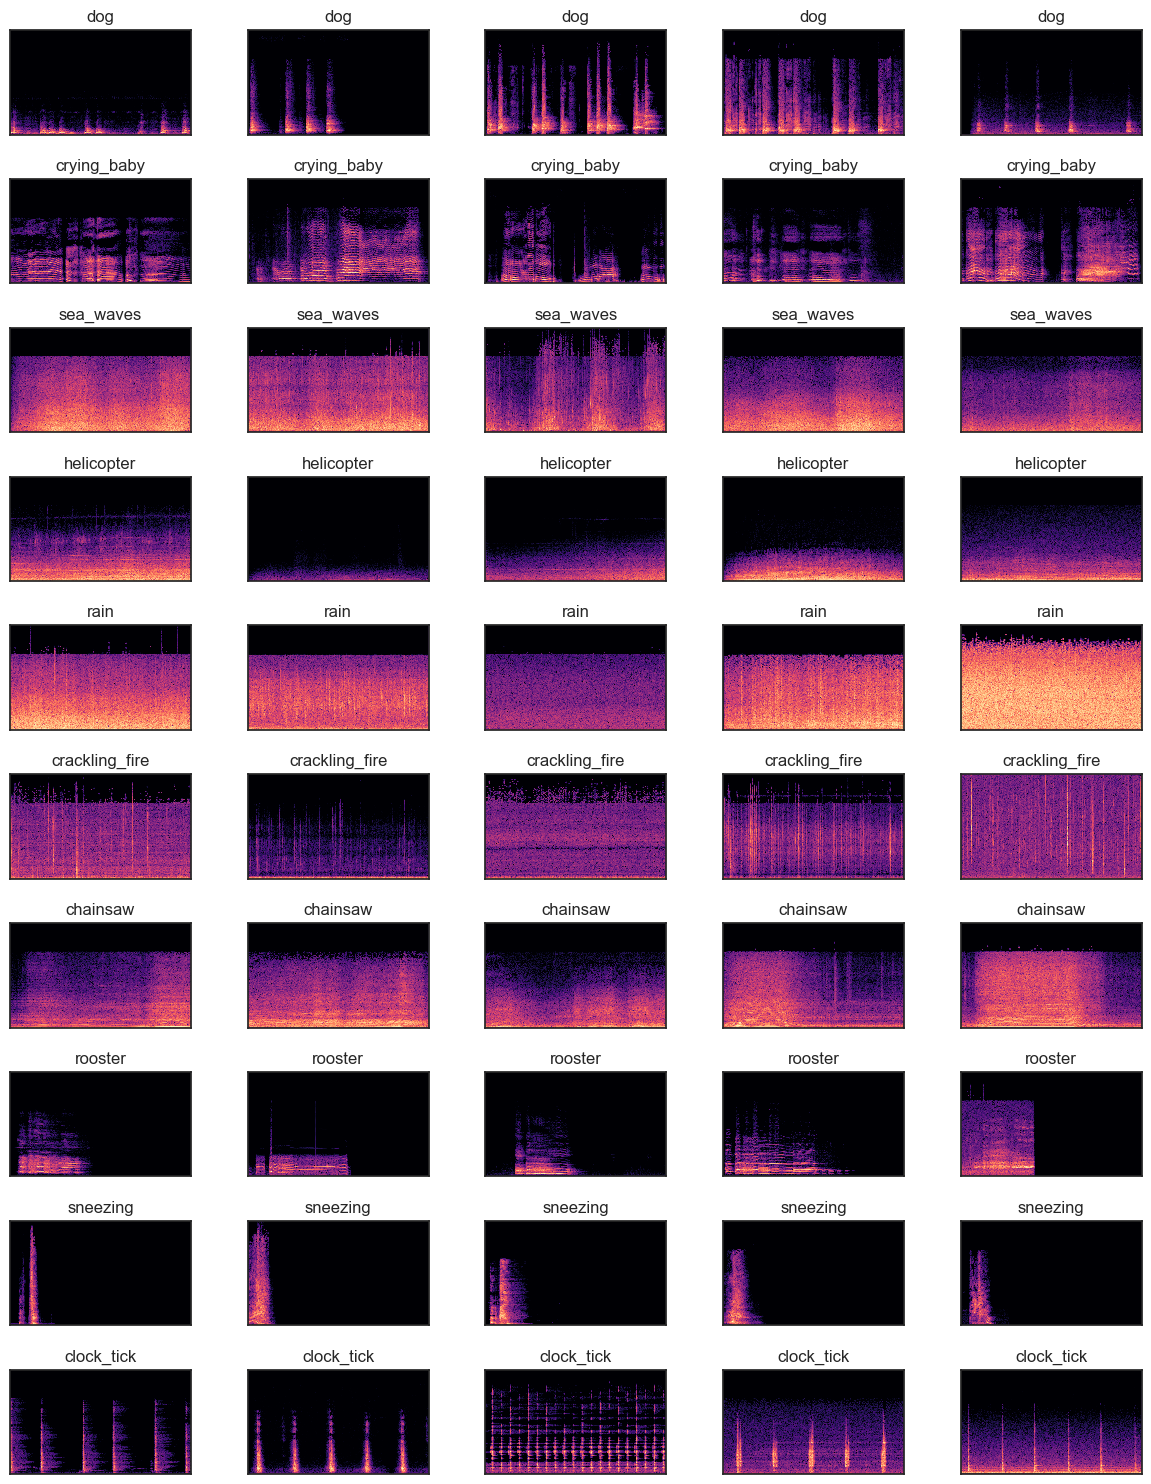

In [9]:
plot_clip_overview(df_ESC10) #clearly you can pass only df_ESC10 or df_ESC50

In [10]:
#audio = r'C:\Users\latta\GitHub\Human_Data_Analytics_Project_2023\data\ESC-50\1-137-A-32.wav'
audio = '/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/1-137-A-32.wav'
y, sr = librosa.load(audio,sr=44100)
librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True)

array([[-4.5337439e+02, -5.6834198e+02, -5.0387729e+02, ...,
        -3.4366354e+02, -1.3529082e+02, -3.7128345e+02],
       [ 1.3434491e+02,  1.7694389e+02,  1.2607414e+02, ...,
         1.5418506e+02,  1.3391547e+02,  1.7108144e+02],
       [-8.1748438e+00, -3.6898050e+00, -7.4755493e+01, ...,
        -7.2405151e+01, -8.7364182e+01, -5.1034069e+01],
       ...,
       [ 2.1181242e+00,  5.0022650e+00,  3.5919719e+00, ...,
         8.3187742e+00,  8.8611698e+00, -4.1883123e-01],
       [-1.3518436e+00,  2.6005309e+00, -1.2373867e+00, ...,
         5.2695870e+00, -8.0891695e+00,  8.6519778e-01],
       [ 2.9803199e-01,  5.3931212e-01, -1.4929016e+00, ...,
        -8.0441837e+00, -9.1008205e+00, -8.1665707e+00]], dtype=float32)

## Auxiliary Classes

In [11]:

class Clip():
    """A single 5-sec long recording."""
    
    samplerate = 44100   # All recordings in ESC are 44.1 kHz
    frame = 512    # Frame size in samples
    
    def __init__(self, path):
        self.path = path
        y,sr = librosa.load(self.path,sr=samplerate)
        self.raw = y
        

    #cosa vogliamo che faccia la classe che fa il load della singola clip audio?


## Pandas dataset

In [12]:
audio_directory = '/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/'
audio_paths = [os.path.join(audio_directory, filename) for filename in df_ESC10['filename']]

audio_data = []
for audio_path in audio_paths:
    audio, _ = librosa.load(audio_path, sr=None)  # Set sr=None to load the audio file with its original sampling rate
    audio_data.append(audio)
pd_df = pd.DataFrame({'audio': audio_data, 'target': df_ESC10['target']})

In [13]:
pd_df

,audio,target
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
14,"[-0.0025634766, -0.0011291504, 0.00012207031, ...",0
24,"[-0.01260376, -0.015045166, -0.0154418945, -0....",41
54,"[0.0014343262, 0.0017700195, 0.0015563965, 0.0...",12
55,"[0.11935425, 0.1296997, 0.14428711, 0.20455933...",40
...,...,...
1876,"[-0.0011291504, -0.0012207031, -0.00033569336,...",1
1888,"[-0.0008239746, -0.002380371, -0.0033569336, -...",1
1889,"[0.0036315918, 0.0051879883, 0.0048217773, 0.0...",1
1894,"[0.0010375977, 0.0013427734, 0.0012207031, 0.0...",38


## Tensorflow dataset

In [70]:
import tensorflow as tf
import pandas as pd
import os
import librosa

audio_directory = '/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/'
audio_paths = [os.path.join(audio_directory, filename) for filename in df_ESC10['filename']]



In [71]:
def load_audio(audio_path):
    audio, _ = librosa.load(audio_path, sr=44100) 
    return audio

In [72]:
preprocessed_audio = []
labels = []

for audio_file in audio_paths:
    preprocessed_audio.append(load_audio(audio_file))

# Convert the preprocessed audio and labels lists to TensorFlow tensors
preprocessed_audio = tf.convert_to_tensor(preprocessed_audio)
labels = tf.convert_to_tensor(df_ESC10['target'])

# Create a TensorFlow dataset using the preprocessed audio and labels
dataset = tf.data.Dataset.from_tensor_slices((preprocessed_audio, labels))

# Now you can perform batching, caching, and other operations on the dataset as needed

In [73]:
k = 0
for i,j in dataset:
    print(i.numpy(),j.numpy())
    k +=1
    a = i.numpy()
    break

[0. 0. 0. ... 0. 0. 0.] 0


In [18]:
a.shape

(220500,)

## Tensorflow dataset map

In [177]:
import tensorflow as tf
import pandas as pd
import os

# Define the directory path containing the audio files
audio_directory = '/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/'

# Filter the audio files based on the filenames in the dataframe
audio_files = [os.path.join(audio_directory, filename) for filename in df_ESC10['filename']]

print(type(audio_files[0]))

<class 'str'>


In [178]:
print(type(audio_files[0]))

<class 'str'>


In [179]:
# Define a function to load and preprocess each audio file
def preprocess_audio(audio_path,label):
    audio_data, _ = librosa.load(audio_path.numpy().decode('utf-8'), sr=44100)   # Call your audio loading and preprocessing function
    return audio_data,label

In [180]:
# Create a TensorFlow dataset from the audio files and labels
dataset = tf.data.Dataset.from_tensor_slices((audio_files, df_ESC10['target'])) 

In [181]:
dataset

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int32)>

In [ ]:
import codecs
for i,j in dataset:
    print(i.numpy(),j.numpy())
    s = i
    raw_string = s.numpy().decode('utf-8')
    raw_string_2 = s.decode('utf-8')
    print(raw_string)
    print(raw_string_2)
    print(type(raw_string))
    break


In [ ]:
dataset = dataset.map(preprocess_audio)

## Tensorflow kek

In [217]:
import tensorflow as tf
import pandas as pd
import os

# Define the directory path containing the audio files
audio_directory = '/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/'

# Filter the audio files based on the filenames in the dataframe
audio_paths = [os.path.join(audio_directory, filename) for filename in df_ESC10['filename']]

print(type(audio_files[0]))

<class 'str'>


In [218]:
def preprocess_audio(audio_path):
    audio_path = audio_path.decode('utf-8')
    audio_data, _ = librosa.load(audio_path, sr=44100)
    return audio_data

# Create a TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices(audio_paths)



In [222]:
for i in dataset:
   print(i)
   print(tf.compat.path_to_str(i))
   break

tf.Tensor(b'/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/1-100032-A-0.wav', shape=(), dtype=string)
tf.Tensor(b'/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/1-100032-A-0.wav', shape=(), dtype=string)


In [205]:
# Apply preprocess_audio using tf.py_function
dataset = dataset.map(lambda x: tf.py_function(preprocess_audio, [x], [tf.float32]))